**420-A58-SF - Algorithmes d'apprentissage non supervisé - Hiver 2023 - Spécialisation technique en Intelligence Artificielle**<br/>
MIT License - Copyright (c) 2023 Mikaël Swawola
<br/>
![Travaux Pratiques - Regroupement hiérachique](static/01-03-banner.png)
<br/>
**Objectif:** cette séance de travaux pratiques a pour objectif l'analyse de données génomiques (jeu de données NCI60). Les techniques mise en oeuvre seront l'ACP et le regroupement hiérarchique

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

# Le reste des modules sera importé au fur et à mesure des exercices ...

In [3]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
# Configuration de la visualisation
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.figsize']=(12,8)

## 1 - Lecture des données

Les méthodes d'apprentissage non supervisé comme l'ACP et le clustering sont très populaires en analyse des données génomiques. Ces méthodes seront illustrées sur le jeu de données de biopuces NCI60, qui
consiste en 6830 **mesures d'expression de gènes** sur 64 lignées de cellules cancéreuses.

**Exercice 1-1 - À l'aide de la librairie Pandas, lire le fichier de données `NCI60.csv`**

In [4]:
# Compléter cette cellule ~ 1 ligne de code
nci60 = pd.read_csv('../../data/NCI60.csv', index_col=[0])

**Exercice 1-2 - Combien d'observations et de variables compte le jeu de données ? Que constatez vous ?**

In [5]:
# Compléter cette cellule ~ 1 ligne de code
# Fat data nb col > nb obs
nci60.shape

(64, 6830)

**Exercice 1-3 - Une chance, ce jeu de données est fourni avec le type de cancer pour chaque cellule cancéreuse. Lire le fichier `NCI60-labels.csv`**

In [6]:
# Compléter cette cellule ~ 1 ligne de code
nci60_labels = pd.read_csv('../../data/NCI60-labels.csv', index_col=[0])
nci60_labels['x'].unique()

array(['CNS', 'RENAL', 'BREAST', 'NSCLC', 'UNKNOWN', 'OVARIAN',
       'MELANOMA', 'PROSTATE', 'LEUKEMIA', 'K562B-repro', 'K562A-repro',
       'COLON', 'MCF7A-repro', 'MCF7D-repro'], dtype=object)

**Exercice 1-4 - Selon vous, est-il nécéssaire de mettre à l'échelle (standardiser ou normaliser) le jeu de données ? Justifier votre réponse.**

In [9]:
# Votre réponse ici
nci60.describe()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,-0.019063,-0.027813,-0.019923,-0.328673,0.026093,0.006718,0.019687,-0.023126,0.000780,0.019237,...,-0.079551,0.402577,0.295077,0.171093,0.101152,0.153671,0.090775,-0.126798,0.129921,0.143514
std,0.441332,0.757433,0.433306,1.091905,0.485073,0.350432,0.370683,0.338629,0.429188,0.641583,...,0.890365,1.131769,1.121419,0.888764,0.641122,0.924292,1.209138,0.787136,0.566303,1.509312
min,-1.060000,-2.190000,-1.710000,-2.610000,-0.825000,-0.700000,-0.920000,-0.705000,-0.900000,-1.654981,...,-1.850020,-0.775000,-1.150000,-2.095000,-1.390020,-1.330000,-2.030010,-1.700000,-0.910000,-2.830000
25%,-0.372500,-0.404985,-0.192485,-1.322500,-0.225000,-0.156250,-0.246250,-0.204985,-0.360000,-0.477466,...,-0.660019,-0.177500,-0.327500,-0.328750,-0.232519,-0.330000,-0.602510,-0.682500,-0.275000,-1.100000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.310005,0.352500,0.162490,0.692500,0.210000,0.184995,0.247505,0.160015,0.295000,0.467519,...,0.304980,0.560000,0.422500,0.427500,0.302480,0.325000,0.134995,0.302505,0.451255,1.250000
max,0.940000,2.240000,1.150000,1.500000,1.715000,1.160000,0.940000,0.724961,0.990000,1.490019,...,2.929980,5.200000,5.510000,3.995000,2.899980,4.600000,5.339990,2.560000,2.030000,3.940000


## 2 - Analyse en composantes principales (ACP)

**Exercice 2-1 - À l'aide de la libraire Scikit-learn, effectuer une analyse en composantes principales. Vérifier la proportion de variance (PVE) et afficher sur un graphique les deux premières composantes et le type de cancer. Que constatez-vous ?**

In [14]:
# Compléter cette cellule (ACP) ~ 3 lignes de code

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(nci60)
nci_60_pca = pca.transform(nci60)

<BarContainer object of 64 artists>

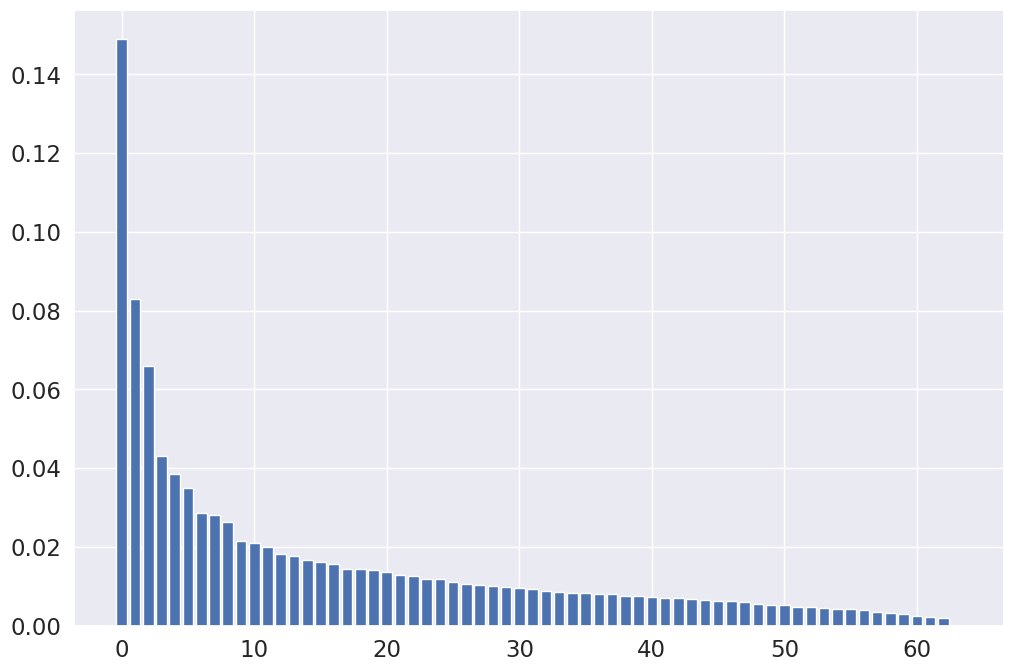

In [16]:
pca.n_components_
plt.bar(range(0, pca.n_components_), pca.explained_variance_ratio_)

In [ ]:
# Compléter cette cellule (variance) ~ 1 ligne de code (barchart: variance /composante)

In [ ]:
# Compléter cette cellule (affichage) ~ 1 ligne de code (scatterplot: PC1 et PC2)

In [ ]:
# Pour la fois prochaine:
# Afficher le diagramme en nuages de points avec coloration des différentes observations.
# Mettre la capture d'écran du diagramme sur le forum.

## 3 - Regroupement hiérarchique

Nous effectuons maintenant le regroupement hiérarchique à l'aide des 4 méthodes de lien vus en cours: Ward, Complete, Average et Single. La distance euclidienne est utilisée comme mesure de dissimilarité. Pour chaque lien, afficher le dendrogramme correspondant (voir `helpers.py`)

**Exercice 3-1 - Linkage par défaut (Ward)**

In [ ]:
# Compléter cette cellule ~ 2 lignes de code

**Exercice 3-2 - Linkage Complete**

In [ ]:
# Compléter cette cellule ~ 2 lignes de code

**Exercice 3-3 - Linkage average**

In [ ]:
# Compléter cette cellule ~ 2 lignes de code

**Exercice 3-4 - Linkage Single**

In [ ]:
# Compléter cette cellule ~ 2 lignes de code

**Exercice 3-5 - Compte tenu des résultats précédents, choisir une méthode de lien et seuiller le dendrogramme à la hauteur "optimale"**

In [ ]:
# Compléter la cellule ~ 2 lignes de code

## 4 - Partitionnement K-moyennes

**Exercice 4 - Comparer les résultats précédents avec le partitionnement K-moyennes**

In [ ]:
# Compléter la cellule ~ 5-10 lignes de code

## 5 - Débruitage des données par ACP (optionnel)

**Exercice 5 - Effectuer le regroupement hiérarchique directement sur les premières composantes principales. Comparer les résultats obtenus avec ceux du jeu de données "complet"**

In [ ]:
# Compléter la cellule ~ X lignes de code

## 6 - Références

Cet atelier est grandement inspiré du Lab 3: NCI60 Data Example (Introduction to statistical learning)

**Fin de l'atelier 01-03**